In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import sys
sys.path.append("../")
import graphdata

In [2]:
def draw_graph(data, index):
    A = data.adj_list[index]
    G = nx.from_numpy_array(A)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_size=200, node_color=np.ones(3), edgecolors=np.zeros(3))
    plt.show()
    print('label', data.labels[index]) 

    
def plot_hist(data):
    shapes = np.array([A.shape[0] for A in data['Adj_matrices']])
    plt.figure(figsize=(18, 5))
    plt.subplot(131)
    label_bins = len(np.unique(data['graph_labels']))
    plt.hist(data['graph_labels'], bins=label_bins)
    plt.xlabel(r'Graph label', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.subplot(132)
    plt.hist(shapes, bins=len(np.unique(shapes)))
    plt.xlabel(r'Graph size (number of nodes), $N$', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.subplot(133)
    plt.hist2d(data['graph_labels'], shapes, bins=[label_bins, 20])
    plt.xlabel(r'Graph label', fontsize=12)
    plt.ylabel(r'Graph size (number of nodes), $N$', fontsize=12)
    plt.colorbar()
    plt.show()
    print('Correlation between the graph size and labels: %.2f' % 
          np.corrcoef(data['graph_labels'], shapes)[0,1])

    
def visualize_data(dataset, nodes_train_max): 
    datareader = graphdata.DataReader(data_dir='../data/%s' % dataset,
                                      N_nodes=nodes_train_max,
                                      use_cont_node_attr=False,
                                      folds=10)
    data_train = graphdata.GraphData(datareader, 0, split='train_val')
    data_test = graphdata.GraphData(datareader, 0, split='test')

    shapes = np.array([A.shape[0] for A in data_train.adj_list])
    print('{}-Train: {} graphs, N_nodes_min={}, N_nodes_max={}'.format(dataset, 
                                                                              len(shapes), 
                                                                              shapes.min(), 
                                                                              shapes.max()))
    plot_hist(data_train)
    for index in range(2):
        draw_graph(data_train, index)

    shapes = np.array([A.shape[0] for A in data_test.adj_list])
    print('{}-Test: {} graphs, N_nodes_min={}, N_nodes_max={}'.format(dataset, 
                                                                          len(shapes), 
                                                                          shapes.min(), 
                                                                          shapes.max()))
    plot_hist(data_test)
    for index in range(2):
        draw_graph(data_test, index)        

# COLLAB

N nodes avg/std/min/max: 	74.49/62.30/32/492
N edges avg/std/min/max: 	2457.35/6438.91/60/40119
Node degree avg/std/min/max: 	65.98/79.23/1/491
Node features dim: 		492
N classes: 			3
Classes: 			[0 1 2]
Class 0: 			2600 samples
Class 1: 			775 samples
Class 2: 			1625 samples
681/5000 graphs with at least 35 nodes
generating 10-fold cross-validation splits
0 450 50
1 450 50
2 450 50
3 450 50
4 450 50
5 450 50
6 450 50
7 450 50
8 450 50
9 450 50
TRAIN_VAL: 500/5000
Class 0: 			226 samples
Class 1: 			135 samples
Class 2: 			139 samples
TEST: 4500/5000
Class 0: 			2374 samples
Class 1: 			640 samples
Class 2: 			1486 samples
COLLAB-Train: 500 graphs, N_nodes_min=32, N_nodes_max=35


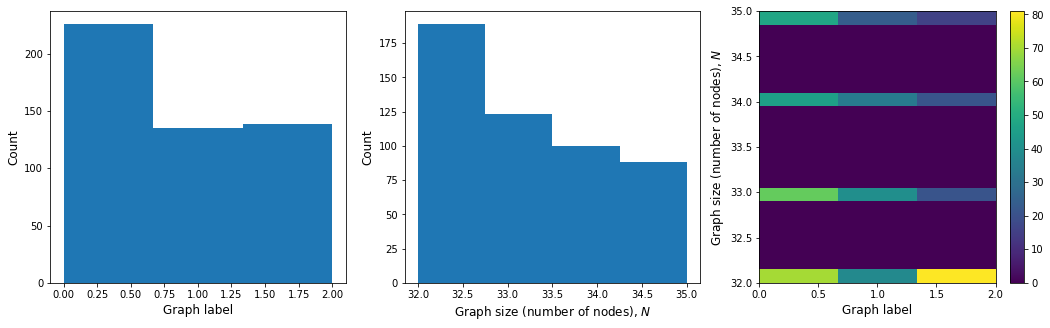

Correlation between the graph size and labels: -0.18


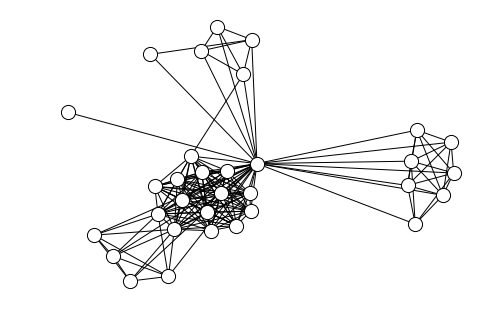

label 0


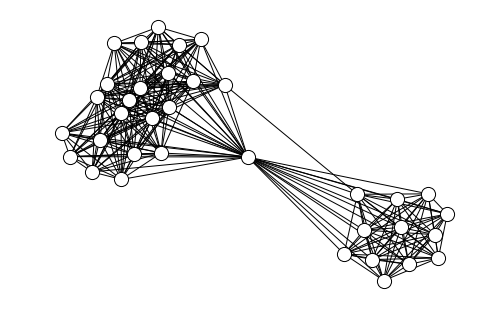

label 0
COLLAB-Test: 4500 graphs, N_nodes_min=32, N_nodes_max=492


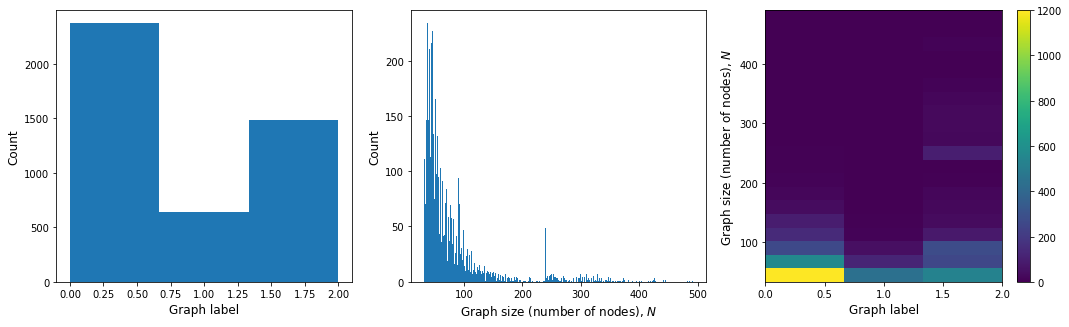

Correlation between the graph size and labels: 0.26


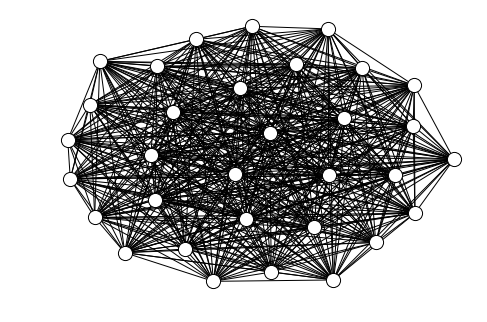

label 2


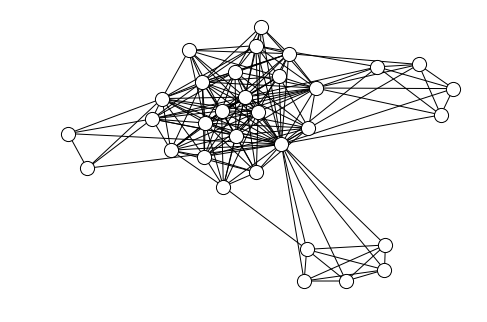

label 1


In [3]:
visualize_data('COLLAB', 35)  # takes longer time for COLLAB

# PROTEINS

N nodes avg/std/min/max: 	39.06/45.76/4/620
N edges avg/std/min/max: 	72.82/84.60/5/1049
Node degree avg/std/min/max: 	3.73/1.15/0/25
Node features dim: 		3
N classes: 			2
Classes: 			[0 1]
Class 0: 			663 samples
Class 1: 			450 samples
feature 0, count 21151/43471
feature 1, count 20931/43471
feature 2, count 1389/43471
548/1113 graphs with at least 25 nodes
generating 10-fold cross-validation splits
0 450 50
1 450 50
2 450 50
3 450 50
4 450 50
5 450 50
6 450 50
7 450 50
8 450 50
9 450 50
TRAIN_VAL: 500/1113
Class 0: 			204 samples
Class 1: 			296 samples
TEST: 613/1113
Class 0: 			459 samples
Class 1: 			154 samples
PROTEINS-Train: 500 graphs, N_nodes_min=4, N_nodes_max=25


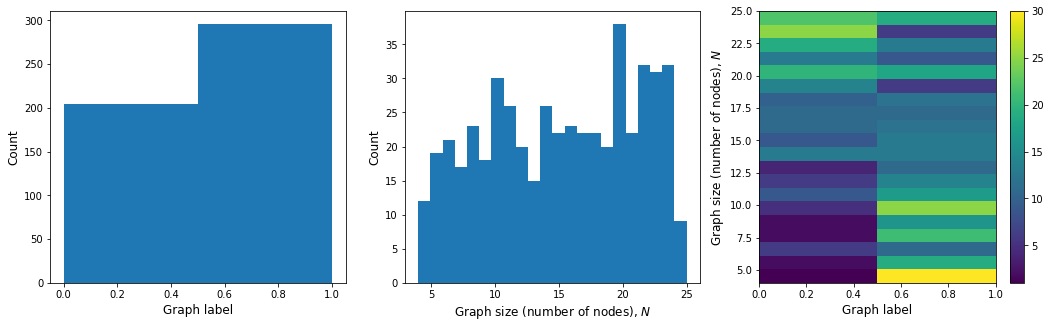

Correlation between the graph size and labels: -0.39


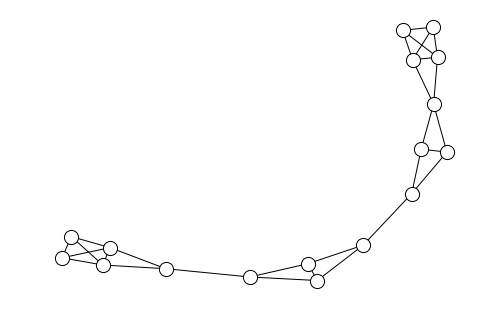

label 0


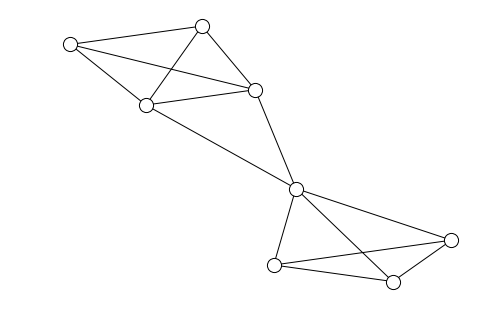

label 1
PROTEINS-Test: 613 graphs, N_nodes_min=4, N_nodes_max=620


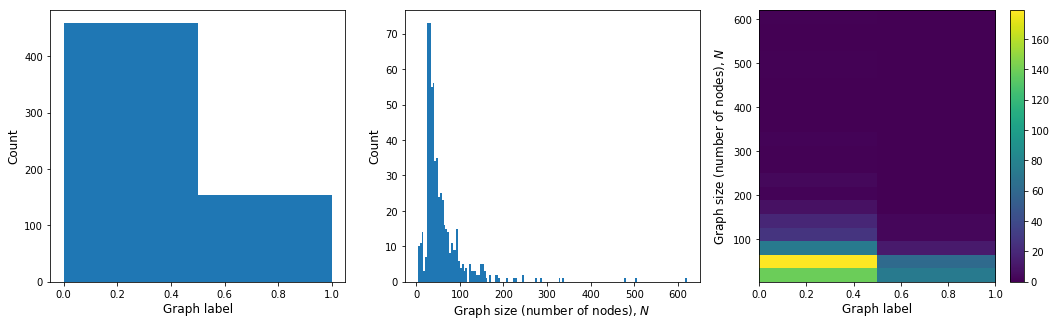

Correlation between the graph size and labels: -0.18


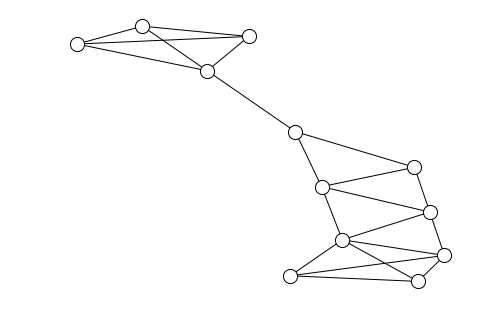

label 0


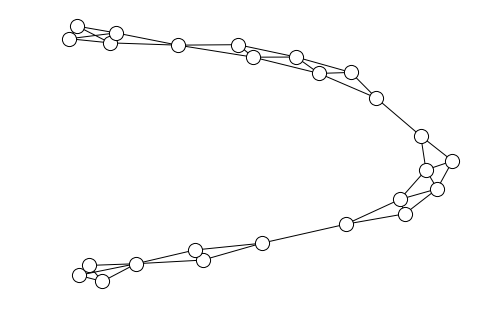

label 0


In [4]:
visualize_data('PROTEINS', 25)

# D&D-200 and D&D-300

N nodes avg/std/min/max: 	284.32/272.00/30/5748
N edges avg/std/min/max: 	715.66/693.91/63/14267
Node degree avg/std/min/max: 	5.03/1.69/1/19
Node features dim: 		89
N classes: 			2
Classes: 			[0 1]
Class 0: 			691 samples
Class 1: 			487 samples
feature 1, count 28071/334925
feature 2, count 16190/334925
feature 3, count 14656/334925
feature 4, count 19873/334925
feature 5, count 4750/334925
feature 6, count 12329/334925
feature 7, count 21831/334925
feature 8, count 25843/334925
feature 9, count 7608/334925
feature 10, count 18977/334925
feature 11, count 29527/334925
feature 12, count 19903/334925
feature 13, count 7275/334925
feature 14, count 13381/334925
feature 15, count 15627/334925
feature 16, count 19561/334925
feature 17, count 18897/334925
feature 18, count 4619/334925
feature 19, count 11886/334925
feature 20, count 23735/334925
feature 21, count 1/334925
feature 22, count 1/334925
feature 23, count 2/334925
feature 24, count 1/334925
feature 25, count 1/334925
feature 26

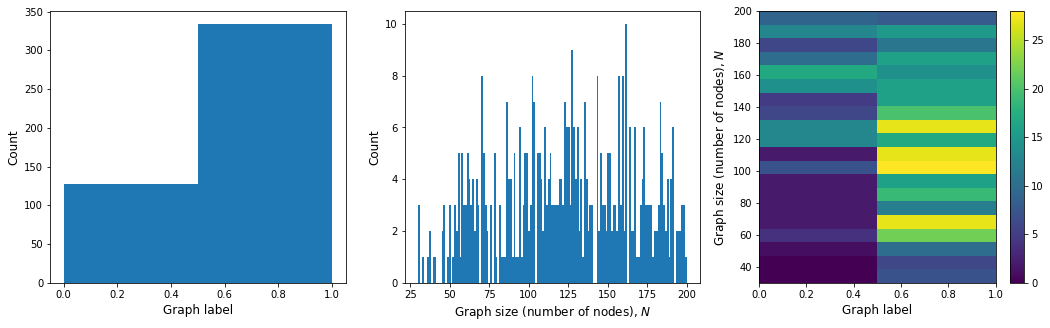

Correlation between the graph size and labels: -0.31


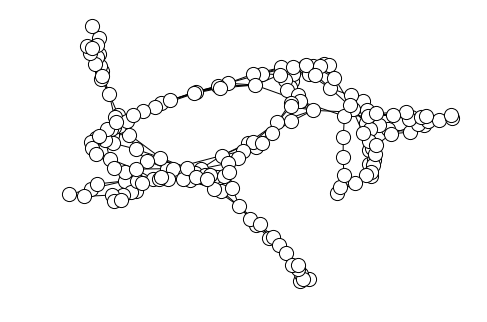

label 1


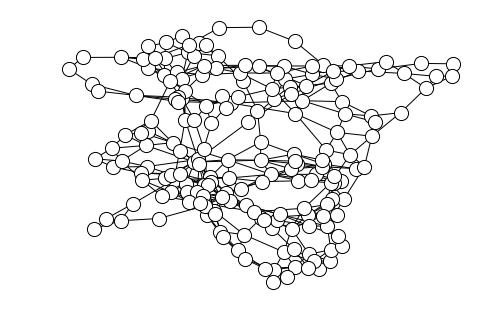

label 0
DD-Test: 716 graphs, N_nodes_min=201, N_nodes_max=5748


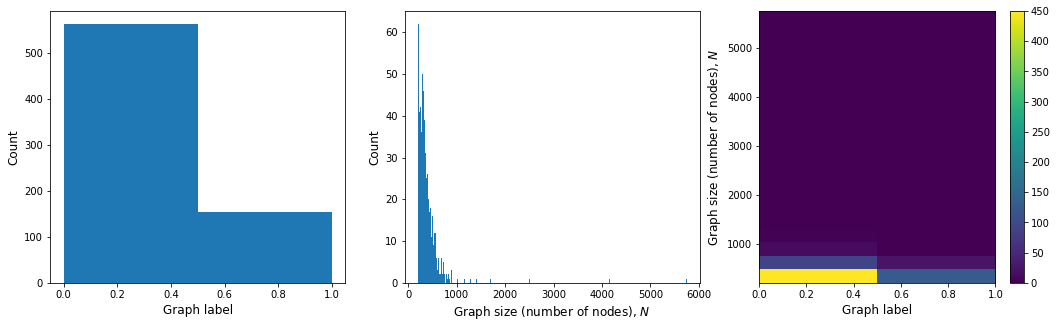

Correlation between the graph size and labels: -0.09


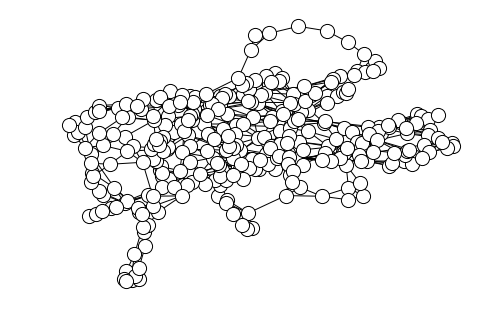

label 0


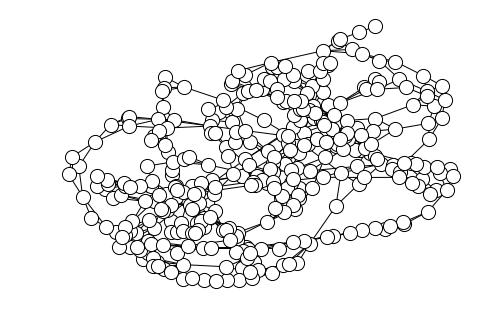

label 0
N nodes avg/std/min/max: 	284.32/272.00/30/5748
N edges avg/std/min/max: 	715.66/693.91/63/14267
Node degree avg/std/min/max: 	5.03/1.69/1/19
Node features dim: 		89
N classes: 			2
Classes: 			[0 1]
Class 0: 			691 samples
Class 1: 			487 samples
feature 1, count 28071/334925
feature 2, count 16190/334925
feature 3, count 14656/334925
feature 4, count 19873/334925
feature 5, count 4750/334925
feature 6, count 12329/334925
feature 7, count 21831/334925
feature 8, count 25843/334925
feature 9, count 7608/334925
feature 10, count 18977/334925
feature 11, count 29527/334925
feature 12, count 19903/334925
feature 13, count 7275/334925
feature 14, count 13381/334925
feature 15, count 15627/334925
feature 16, count 19561/334925
feature 17, count 18897/334925
feature 18, count 4619/334925
feature 19, count 11886/334925
feature 20, count 23735/334925
feature 21, count 1/334925
feature 22, count 1/334925
feature 23, count 2/334925
feature 24, count 1/334925
feature 25, count 1/334925
fe

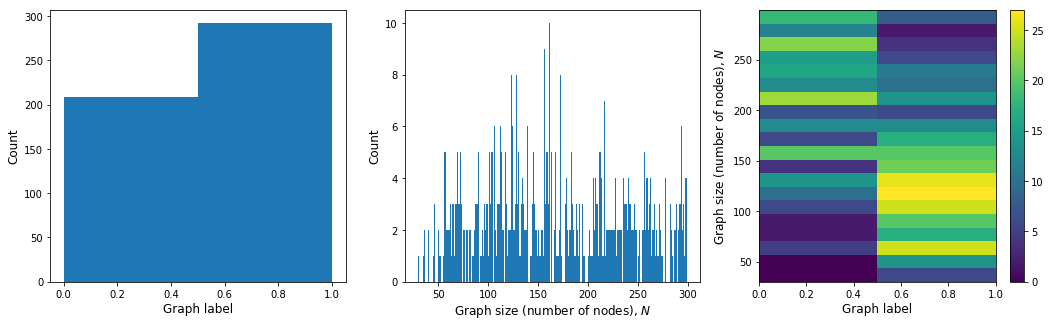

Correlation between the graph size and labels: -0.46


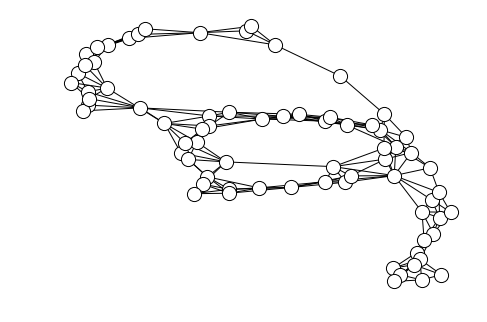

label 1


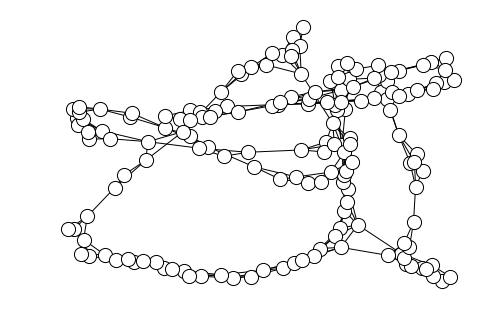

label 1
DD-Test: 678 graphs, N_nodes_min=30, N_nodes_max=5748


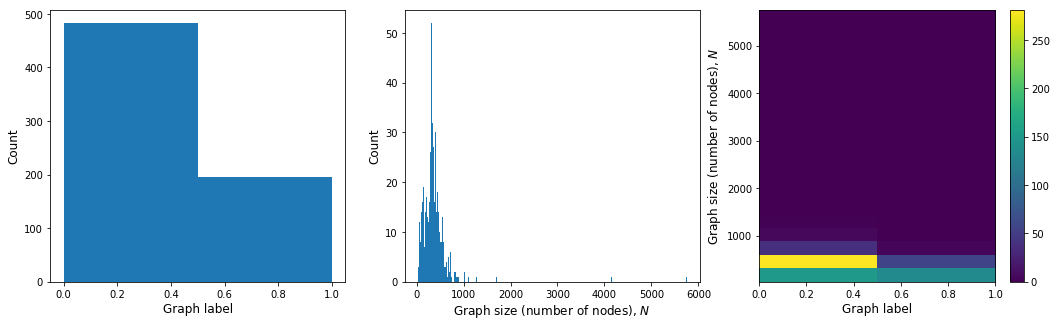

Correlation between the graph size and labels: -0.23


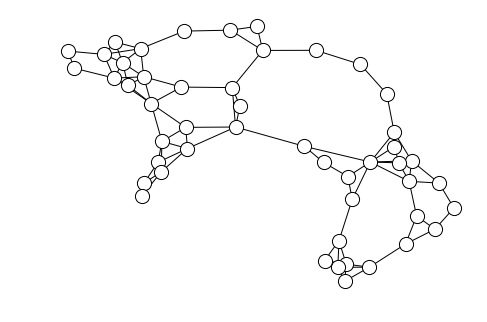

label 1


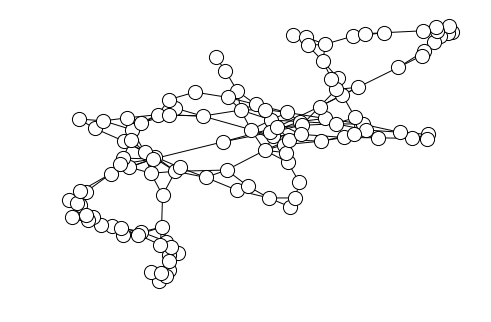

label 0


In [5]:
for nodes_train_max in [200, 300]:
    visualize_data('DD', nodes_train_max)